In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import requests

## Get Request

In [9]:
url="http://books.toscrape.com/"
response=requests.get(url)
print(response.status_code)
print(response.text[:100])


200
<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![end


## Parsing The HTML content


In [10]:
from bs4 import BeautifulSoup
html=response.text
soup=BeautifulSoup(html,'html.parser')
print(soup.title.text)


    All products | Books to Scrape - Sandbox



## Finding All Book Containers on the Page

In [11]:
books=soup.find_all('article',class_='product_pod')
print(len(books))

20


## Extracting the title, Price, and availability of the book

In [19]:
for book in books:
    title=book.h3.a['title']
    prices=book.find('p',class_='price_color').text
    availability=book.find('p',class_='instock availability').text.strip()
    print(f"{title}-{prices}-{availability}")
    

A Light in the Attic-Â£51.77-In stock
Tipping the Velvet-Â£53.74-In stock
Soumission-Â£50.10-In stock
Sharp Objects-Â£47.82-In stock
Sapiens: A Brief History of Humankind-Â£54.23-In stock
The Requiem Red-Â£22.65-In stock
The Dirty Little Secrets of Getting Your Dream Job-Â£33.34-In stock
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull-Â£17.93-In stock
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics-Â£22.60-In stock
The Black Maria-Â£52.15-In stock
Starving Hearts (Triangular Trade Trilogy, #1)-Â£13.99-In stock
Shakespeare's Sonnets-Â£20.66-In stock
Set Me Free-Â£17.46-In stock
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)-Â£52.29-In stock
Rip it Up and Start Again-Â£35.02-In stock
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991-Â£57.25-In stock
Olio-Â£23.88-In stock
Mesaerion: The Best Science Fiction Stories 1800-1849-Â£37.59-In stock
Libertarianism for B

## Scraping All Pages of the Website

In [21]:
from urllib.parse import urljoin
next_li=soup.find('li',class_='next')
if next_li:
    next_url=next_li.a['href']
    full_next_url=urljoin(url,next_url)

In [22]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

base_url = "http://books.toscrape.com/"
current_url = base_url

while True:
    response = requests.get(current_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    books = soup.find_all('article', class_='product_pod')

    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text
        availability = book.find('p', class_='instock availability').text.strip()
        print(f"{title} - {price} - {availability}")

    # Find the next page
    next_button = soup.find('li', class_='next')
    if next_button:
        next_url = next_button.a['href']
        current_url = urljoin(current_url, next_url)
    else:
        break  # Exit loop if no more pages


A Light in the Attic - Â£51.77 - In stock
Tipping the Velvet - Â£53.74 - In stock
Soumission - Â£50.10 - In stock
Sharp Objects - Â£47.82 - In stock
Sapiens: A Brief History of Humankind - Â£54.23 - In stock
The Requiem Red - Â£22.65 - In stock
The Dirty Little Secrets of Getting Your Dream Job - Â£33.34 - In stock
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull - Â£17.93 - In stock
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics - Â£22.60 - In stock
The Black Maria - Â£52.15 - In stock
Starving Hearts (Triangular Trade Trilogy, #1) - Â£13.99 - In stock
Shakespeare's Sonnets - Â£20.66 - In stock
Set Me Free - Â£17.46 - In stock
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1) - Â£52.29 - In stock
Rip it Up and Start Again - Â£35.02 - In stock
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991 - Â£57.25 - In stock
Olio - Â£23.88 - In stock
Mesaerion: The Best Sci

## Store scraping data in a list of dictionaries

In [23]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

base_url = "http://books.toscrape.com/"
current_url = base_url

book_data = []

while True:
    response = requests.get(current_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    books = soup.find_all('article', class_='product_pod')

    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text
        availability = book.find('p', class_='instock availability').text.strip()
        
        rating = book.p['class'][1]  # e.g. 'One', 'Two', etc.

        book_data.append({
            'title': title,
            'price': price,
            'availability': availability,
            'rating': rating
        })

    next_button = soup.find('li', class_='next')
    if next_button:
        next_url = next_button.a['href']
        current_url = urljoin(current_url, next_url)
    else:
        break

# Convert to DataFrame
df = pd.DataFrame(book_data)
print(df.head())


                                   title    price availability rating
0                   A Light in the Attic  Â£51.77     In stock  Three
1                     Tipping the Velvet  Â£53.74     In stock    One
2                             Soumission  Â£50.10     In stock    One
3                          Sharp Objects  Â£47.82     In stock   Four
4  Sapiens: A Brief History of Humankind  Â£54.23     In stock   Five


In [28]:
response.encoding = 'utf-8'  # or 'utf-8-sig' if needed
html = response.text
soup = BeautifulSoup(html, 'html.parser')


## Converting Price_column from string to float


In [31]:
df['price'].dtype

dtype('float64')

In [33]:
rating_map={"One":1,
           "Two":2,
           "Three":3,
           "Four":4,
           "Five":5
           }
df['rating']=df['rating'].map(rating_map)

In [35]:
df['stock'] = df['availability'].str.extract(r'(\d+)').astype(float)
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,title,price,availability,rating,stock
0,A Light in the Attic,51.77,In stock,3,NaN
1,Tipping the Velvet,53.74,In stock,1,NaN
2,Soumission,50.10,In stock,1,NaN
3,Sharp Objects,47.82,In stock,4,NaN
4,Sapiens: A Brief History of Humankind,54.23,In stock,5,NaN


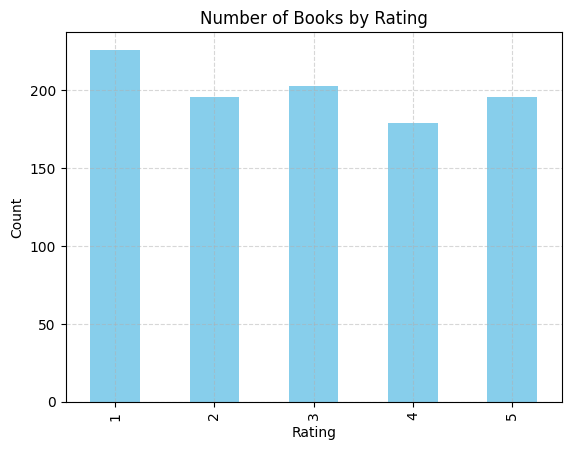

In [37]:
import matplotlib.pyplot as plt

df['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Books by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
